In [1]:
import ast
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\user\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


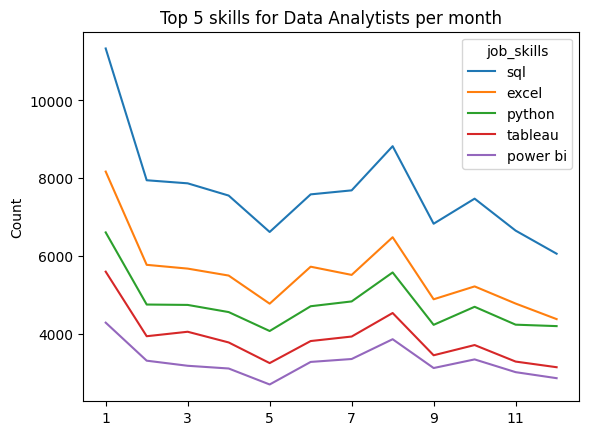

In [2]:
df_job = df[df['job_title_short']== 'Data Analyst'].copy()
df_job['job_posted_month'] = df_job['job_posted_date'].dt.month
df_explode = df_job.explode('job_skills')
df_pivot = df_explode.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)
df_pivot.loc['Total'] = df_pivot.sum()
df_pivot = df_pivot[df_pivot.loc['Total'].sort_values(ascending=False).index]
df_pivot = df_pivot.drop('Total')
df_pivot.iloc[:, :5].plot(kind='line')
plt.title('Top 5 skills for Data Analytists per month')
plt.ylabel('Count')
plt.xlabel("")
plt.show()